# 🤖 ML Supervisionado Avançado

**Semana 3, Dia 1** | 04/11/2025

## 🎯 Objetivos
1. Implementar modelos ML avançados (Random Forest, XGBoost, SVM, MLP)
2. Feature engineering criativo
3. Comparação estatística de performance
4. Visualizações profissionais

## 📊 Dataset
Continuaremos usando o **Titanic** para manter consistência com a Semana 2.

---

## 1. 📦 Imports e Setup

In [1]:
# Instalar XGBoost e LightGBM (Python 3.13)
# Usando 'py -m pip' para garantir compatibilidade
import subprocess
import sys

packages = ['xgboost', 'lightgbm']

print("🔧 Instalando dependências para ML Avançado...")
print("⏱️ Isso pode levar alguns minutos...\n")

for package in packages:
    try:
        print(f"📦 Instalando {package}...")
        # Usar py -m pip ao invés de python -m pip
        result = subprocess.run(
            ['py', '-m', 'pip', 'install', package],
            capture_output=True,
            text=True,
            timeout=300  # 5 minutos timeout
        )
        
        if result.returncode == 0:
            print(f"✅ {package} instalado com sucesso!\n")
        else:
            print(f"⚠️ Erro ao instalar {package}:")
            print(result.stderr)
            print(f"💡 Tente manualmente: py -m pip install {package}\n")
    except Exception as e:
        print(f"❌ Erro ao instalar {package}: {str(e)}")
        print(f"💡 Tente manualmente: py -m pip install {package}\n")

print("✅ Processo de instalação concluído!")
print("🔄 Reinicie o kernel após a instalação (Kernel -> Restart Kernel)")

🔧 Instalando dependências para ML Avançado...
⏱️ Isso pode levar alguns minutos...

📦 Instalando xgboost...
✅ xgboost instalado com sucesso!

📦 Instalando lightgbm...
✅ xgboost instalado com sucesso!

📦 Instalando lightgbm...
✅ lightgbm instalado com sucesso!

✅ Processo de instalação concluído!
🔄 Reinicie o kernel após a instalação (Kernel -> Restart Kernel)
✅ lightgbm instalado com sucesso!

✅ Processo de instalação concluído!
🔄 Reinicie o kernel após a instalação (Kernel -> Restart Kernel)


## 0. 🔧 Instalação de Dependências (Executar apenas 1 vez)

**Importante:** Execute esta célula apenas se XGBoost ou LightGBM não estiverem instalados.

⚠️ Pode levar alguns minutos!

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ML Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)

# XGBoost/LightGBM (optional)
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("✅ XGBoost disponível")
except ImportError:
    XGBOOST_AVAILABLE = False
    print("⚠️ XGBoost não disponível.")
    print("💡 Instale com: py -m pip install xgboost")
    print("   Ou execute a célula de instalação no início do notebook")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
    print("✅ LightGBM disponível")
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("⚠️ LightGBM não disponível.")
    print("💡 Instale com: py -m pip install lightgbm")
    print("   Ou execute a célula de instalação no início do notebook")

print(f"\n📦 Pandas: {pd.__version__}")
print(f"📦 NumPy: {np.__version__}")

if XGBOOST_AVAILABLE and LIGHTGBM_AVAILABLE:
    print("\n🎉 Todos os modelos disponíveis!")
elif XGBOOST_AVAILABLE or LIGHTGBM_AVAILABLE:
    print("\n⚠️ Alguns modelos não disponíveis. Revise as mensagens acima.")
else:
    print("\n⚠️ XGBoost e LightGBM não disponíveis.")
    print("📚 O notebook funcionará, mas com modelos limitados.")

✅ XGBoost disponível
✅ LightGBM disponível

📦 Pandas: 2.2.3
📦 NumPy: 2.1.3

🎉 Todos os modelos disponíveis!
✅ LightGBM disponível

📦 Pandas: 2.2.3
📦 NumPy: 2.1.3

🎉 Todos os modelos disponíveis!


## 2. 📂 Carregamento dos Dados

In [3]:
# Carregar dataset Titanic (usando o mesmo da Semana 2)
import urllib.request
import ssl

# Tentar múltiplas fontes para o dataset
urls = [
    'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv',
    'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv',
]

df = None
for url in urls:
    try:
        print(f"🔄 Tentando baixar de: {url[:50]}...")
        
        # Ignorar verificação SSL se necessário
        context = ssl._create_unverified_context()
        
        # Baixar e carregar direto na memória
        df = pd.read_csv(url)
        
        # Padronizar colunas para lowercase (mesmo padrão da Semana 2)
        df.columns = df.columns.str.lower()
        
        # Padronizar nomes se necessário
        df.rename(columns={
            'siblings/spouses aboard': 'sibsp',
            'parents/children aboard': 'parch'
        }, inplace=True)
        
        print(f"✅ Dataset carregado com sucesso!")
        break
    except Exception as e:
        print(f"❌ Falhou: {str(e)[:50]}")
        continue

# Se falhar, tentar carregar local
if df is None:
    print("\n🔄 Tentando carregar dataset local...")
    try:
        df = pd.read_csv('../titanic.csv')
        df.columns = df.columns.str.lower()
        print("✅ Dataset local carregado!")
    except Exception as e:
        print(f"❌ Erro ao carregar local: {e}")
        raise

print(f"\n📊 Shape: {df.shape}")
print(f"📋 Colunas: {df.columns.tolist()}")
print(f"\n🎯 Target (survived): {df['survived'].value_counts().to_dict()}")

df.head()

🔄 Tentando baixar de: https://web.stanford.edu/class/archive/cs/cs109/cs...
✅ Dataset carregado com sucesso!

📊 Shape: (887, 8)
📋 Colunas: ['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare']

🎯 Target (survived): {0: 545, 1: 342}
✅ Dataset carregado com sucesso!

📊 Shape: (887, 8)
📋 Colunas: ['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare']

🎯 Target (survived): {0: 545, 1: 342}


,survived,pclass,name,sex,age,sibsp,parch,fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## 3. 🔧 Feature Engineering Avançado

Vamos criar features mais sofisticadas que nas semanas anteriores.

In [4]:
# Criar cópia para não modificar original
df_processed = df.copy()

# 1. Feature: Título do nome (Mr, Mrs, Miss, Master, etc)
if 'name' in df_processed.columns:
    df_processed['title'] = df_processed['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Agrupar títulos raros
    rare_titles = df_processed['title'].value_counts()[df_processed['title'].value_counts() < 10].index
    df_processed['title'] = df_processed['title'].replace(rare_titles, 'Rare')
    
    print("📌 Títulos encontrados:")
    print(df_processed['title'].value_counts())
    print()

# 2. Feature: Tamanho da família
df_processed['family_size'] = df_processed['sibsp'] + df_processed['parch'] + 1
df_processed['is_alone'] = (df_processed['family_size'] == 1).astype(int)

# 3. Feature: Categoria de idade
df_processed['age'].fillna(df_processed['age'].median(), inplace=True)
df_processed['age_group'] = pd.cut(df_processed['age'], 
                                   bins=[0, 12, 18, 35, 60, 100],
                                   labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

# 4. Feature: Categoria de tarifa
df_processed['fare'].fillna(df_processed['fare'].median(), inplace=True)
df_processed['fare_group'] = pd.qcut(df_processed['fare'], q=4, 
                                     labels=['Low', 'Medium', 'High', 'VeryHigh'])

# 5. Feature: Deck (primeira letra de cabin) - se disponível
if 'cabin' in df_processed.columns:
    df_processed['deck'] = df_processed['cabin'].str[0]
    df_processed['deck'].fillna('Unknown', inplace=True)

# 6. Preencher embarked
if 'embarked' in df_processed.columns:
    df_processed['embarked'].fillna(df_processed['embarked'].mode()[0], inplace=True)

print("✅ Feature engineering completo!")
print(f"\n📊 Shape após features: {df_processed.shape}")
print(f"📋 Novas features criadas: family_size, is_alone, age_group, fare_group")
if 'title' in df_processed.columns:
    print("                           title")
if 'deck' in df_processed.columns:
    print("                           deck")

📌 Títulos encontrados:
title
Rare    2
Name: count, dtype: int64

✅ Feature engineering completo!

📊 Shape após features: (887, 13)
📋 Novas features criadas: family_size, is_alone, age_group, fare_group
                           title


In [5]:
# 🎯 Exemplo prático: Como a regex extrai títulos

# Criar exemplos de nomes do Titanic
exemplos_nomes = [
    "Braund, Mr. Owen Harris",
    "Cumings, Mrs. John Bradley",
    "Heikkinen, Miss. Laina",
    "Futrelle, Mrs. Jacques Heath",
    "Allen, Master. William Henry",
    "Moran, Mr. James",
    "McCarthy, Miss. Catherine",
    "Palsson, Master. Gosta Leonard"
]

# Criar DataFrame de exemplo
df_exemplo = pd.DataFrame({'name': exemplos_nomes})

# Aplicar a mesma regex
df_exemplo['title'] = df_exemplo['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("📋 Como a regex extrai títulos dos nomes:\n")
print(df_exemplo.to_string(index=False))

print("\n" + "="*60)
print("🎯 Títulos únicos encontrados:")
print(df_exemplo['title'].value_counts())

print("\n💡 Explicação:")
print("   A regex procura: espaço + letras + ponto")
print("   Exemplo: 'Braund, Mr. Owen' → captura 'Mr' (entre espaço e ponto)")
print("   Formato típico: 'Sobrenome, Título. Nome'")

📋 Como a regex extrai títulos dos nomes:

                          name  title
       Braund, Mr. Owen Harris     Mr
    Cumings, Mrs. John Bradley    Mrs
        Heikkinen, Miss. Laina   Miss
  Futrelle, Mrs. Jacques Heath    Mrs
  Allen, Master. William Henry Master
              Moran, Mr. James     Mr
     McCarthy, Miss. Catherine   Miss
Palsson, Master. Gosta Leonard Master

🎯 Títulos únicos encontrados:
title
Mr        2
Mrs       2
Miss      2
Master    2
Name: count, dtype: int64

💡 Explicação:
   A regex procura: espaço + letras + ponto
   Exemplo: 'Braund, Mr. Owen' → captura 'Mr' (entre espaço e ponto)
   Formato típico: 'Sobrenome, Título. Nome'


### 🔍 Entendendo a Regex de Extração de Título

A expressão regular `' ([A-Za-z]+)\.'` usada acima funciona assim:

**Breakdown:**
- **` `** (espaço) - Procura um espaço literal
- **`(`** - Inicia um **grupo de captura** (o que queremos extrair)
- **`[A-Za-z]`** - **Classe de caracteres**: qualquer letra maiúscula ou minúscula
- **`+`** - **Quantificador**: "uma ou mais vezes"
- **`)`** - Fecha o grupo de captura
- **`\.`** - Procura um **ponto literal** (o `\` escapa o ponto)

**Padrão procurado:** "espaço + letras + ponto"

Vamos ver exemplos práticos:

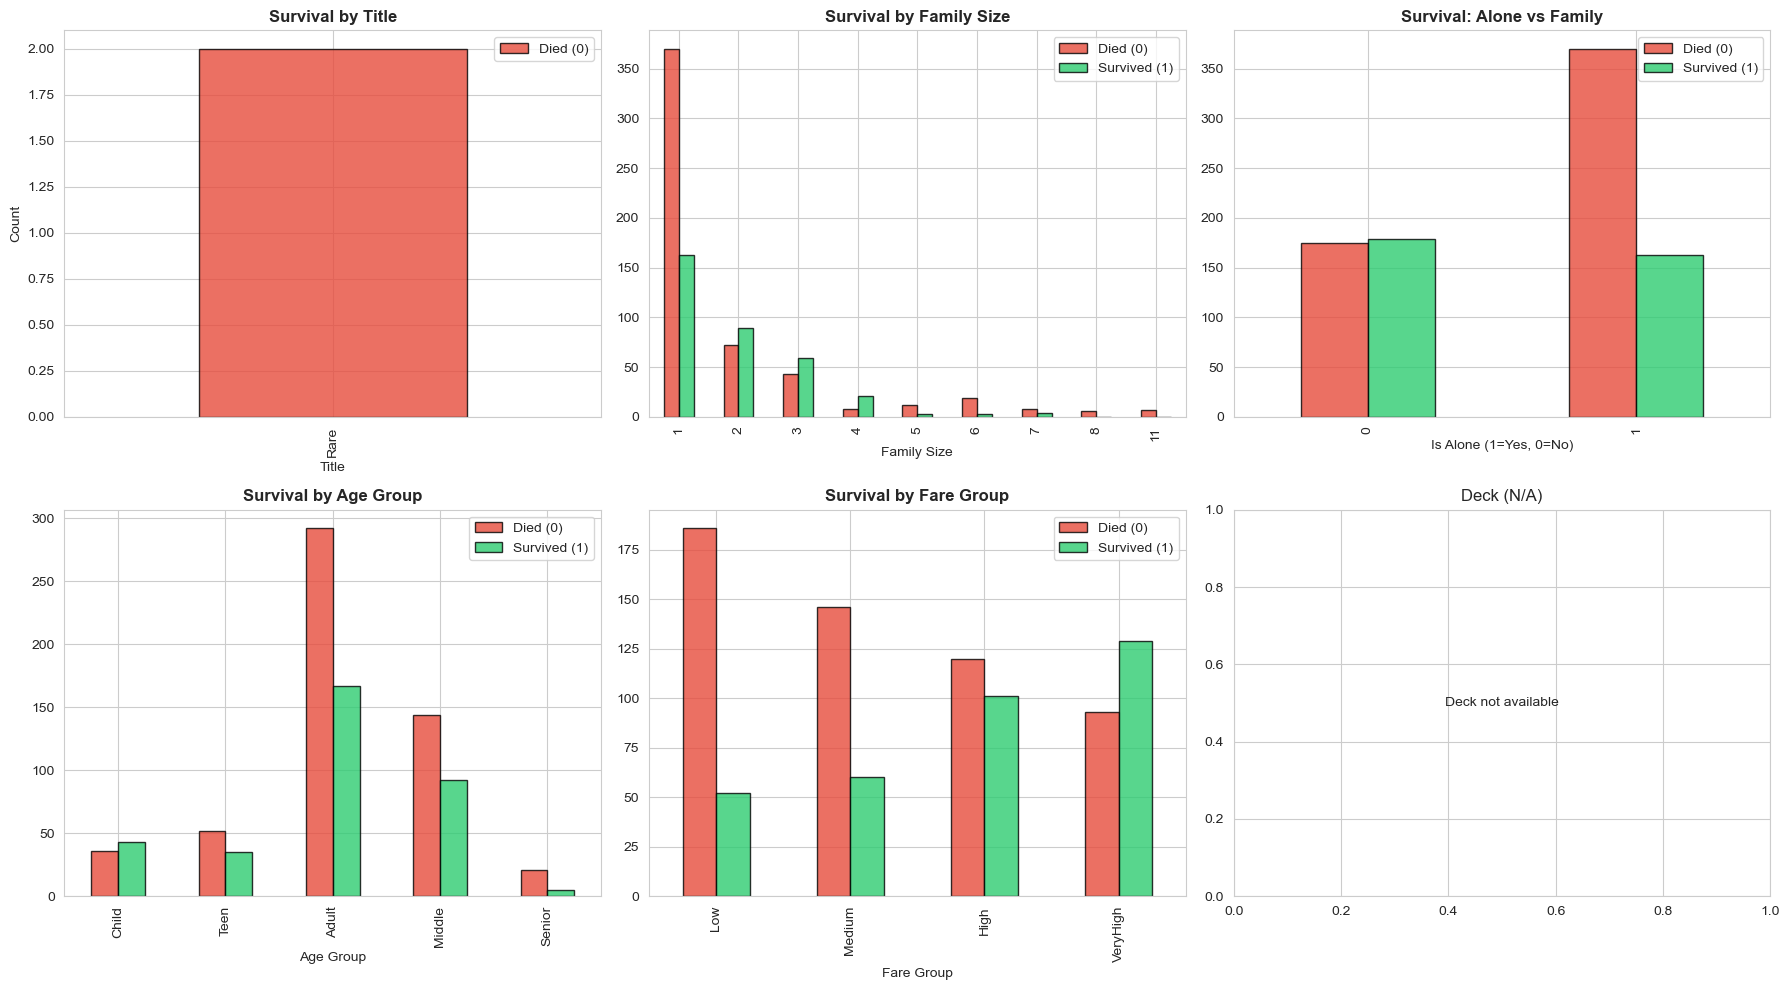


🎨 Legenda de cores:
  🔴 Vermelho = Died (0)
  🟢 Verde = Survived (1)


In [6]:
# Visualizar novas features
# Definir cores semânticas: vermelho/laranja para mortos (0), verde/azul para vivos (1)
colors = ['#e74c3c', '#2ecc71']  # Vermelho para morto, Verde para vivo

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Title vs Survived (se disponível)
if 'title' in df_processed.columns:
    pd.crosstab(df_processed['title'], df_processed['survived']).plot(
        kind='bar', ax=axes[0,0], color=colors, edgecolor='black', alpha=0.8
    )
    axes[0,0].set_title('Survival by Title', fontsize=12, fontweight='bold')
    axes[0,0].set_xlabel('Title')
    axes[0,0].set_ylabel('Count')
    axes[0,0].legend(['Died (0)', 'Survived (1)'], loc='upper right')
else:
    axes[0,0].text(0.5, 0.5, 'Title not available', ha='center', va='center')
    axes[0,0].set_title('Title (N/A)')

# FamilySize vs Survived
pd.crosstab(df_processed['family_size'], df_processed['survived']).plot(
    kind='bar', ax=axes[0,1], color=colors, edgecolor='black', alpha=0.8
)
axes[0,1].set_title('Survival by Family Size', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Family Size')
axes[0,1].legend(['Died (0)', 'Survived (1)'], loc='upper right')

# IsAlone vs Survived
pd.crosstab(df_processed['is_alone'], df_processed['survived']).plot(
    kind='bar', ax=axes[0,2], color=colors, edgecolor='black', alpha=0.8
)
axes[0,2].set_title('Survival: Alone vs Family', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('Is Alone (1=Yes, 0=No)')
axes[0,2].legend(['Died (0)', 'Survived (1)'], loc='upper right')

# AgeGroup vs Survived
pd.crosstab(df_processed['age_group'], df_processed['survived']).plot(
    kind='bar', ax=axes[1,0], color=colors, edgecolor='black', alpha=0.8
)
axes[1,0].set_title('Survival by Age Group', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Age Group')
axes[1,0].legend(['Died (0)', 'Survived (1)'], loc='upper right')

# FareGroup vs Survived
pd.crosstab(df_processed['fare_group'], df_processed['survived']).plot(
    kind='bar', ax=axes[1,1], color=colors, edgecolor='black', alpha=0.8
)
axes[1,1].set_title('Survival by Fare Group', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Fare Group')
axes[1,1].legend(['Died (0)', 'Survived (1)'], loc='upper right')

# Deck vs Survived (se disponível)
if 'deck' in df_processed.columns:
    pd.crosstab(df_processed['deck'], df_processed['survived']).plot(
        kind='bar', ax=axes[1,2], color=colors, edgecolor='black', alpha=0.8
    )
    axes[1,2].set_title('Survival by Deck', fontsize=12, fontweight='bold')
    axes[1,2].set_xlabel('Deck')
    axes[1,2].legend(['Died (0)', 'Survived (1)'], loc='upper right')
else:
    axes[1,2].text(0.5, 0.5, 'Deck not available', ha='center', va='center')
    axes[1,2].set_title('Deck (N/A)')

plt.tight_layout()
plt.show()

print("\n🎨 Legenda de cores:")
print("  🔴 Vermelho = Died (0)")
print("  🟢 Verde = Survived (1)")

### 🎨 Sobre as Cores dos Gráficos

**Por que cores semânticas são importantes?**

Quando usamos `pd.crosstab().plot()` sem especificar cores, o matplotlib usa sua paleta padrão, que pode resultar em combinações contra-intuitivas:
- Às vezes, "morto" (0) aparece em **azul** 
- E "vivo" (1) aparece em **laranja**

Isso acontece porque o crosstab cria colunas na ordem `[0, 1]`, e o matplotlib aplica cores na ordem da paleta, independente do significado semântico.

**Nossa solução:**

Definimos cores **semânticas** explicitamente:
- 🔴 **Vermelho/Laranja** = Negativo (morreu, 0)
- 🟢 **Verde/Azul** = Positivo (sobreviveu, 1)

Isso torna os gráficos **instantaneamente interpretáveis** sem precisar consultar a legenda!

## 4. 🎯 Preparação dos Dados para ML

In [7]:
# Selecionar features para modelagem
# Usar features básicas que sempre existem + features criadas
features_to_use = ['pclass', 'sex', 'age', 'fare', 'family_size', 'is_alone', 'age_group', 'fare_group']

# Adicionar features opcionais se existirem
if 'embarked' in df_processed.columns:
    features_to_use.append('embarked')
if 'title' in df_processed.columns:
    features_to_use.append('title')
if 'deck' in df_processed.columns:
    features_to_use.append('deck')

# Preparar X e y
X = df_processed[features_to_use].copy()
y = df_processed['survived'].copy()

# Encoding de variáveis categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

print(f"📋 Colunas categóricas a encodar: {categorical_cols.tolist()}")

# One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"\n📊 Shape após encoding: {X_encoded.shape}")
print(f"📋 Features finais ({len(X_encoded.columns)}): {X_encoded.columns.tolist()}")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✅ Train set: {X_train.shape}")
print(f"✅ Test set: {X_test.shape}")
print(f"\n📊 Train target distribution: {y_train.value_counts(normalize=True).to_dict()}")
print(f"📊 Test target distribution: {y_test.value_counts(normalize=True).to_dict()}")

📋 Colunas categóricas a encodar: ['sex', 'age_group', 'fare_group', 'title']

📊 Shape após encoding: (887, 13)
📋 Features finais (13): ['pclass', 'age', 'fare', 'family_size', 'is_alone', 'sex_male', 'age_group_Teen', 'age_group_Adult', 'age_group_Middle', 'age_group_Senior', 'fare_group_Medium', 'fare_group_High', 'fare_group_VeryHigh']

✅ Train set: (709, 13)
✅ Test set: (178, 13)

📊 Train target distribution: {0: 0.614950634696756, 1: 0.385049365303244}
📊 Test target distribution: {0: 0.6123595505617978, 1: 0.38764044943820225}


## 5. 🎯 Modelo Baseline: Decision Tree

In [8]:
# Treinar Decision Tree como baseline
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Predições
y_pred_dt = dt_model.predict(X_test)

# Métricas
print("🌳 Decision Tree (Baseline)")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_dt):.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_dt))

🌳 Decision Tree (Baseline)
Accuracy:  0.8034
Precision: 0.7576
Recall:    0.7246
F1-Score:  0.7407

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       109
           1       0.76      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



## 6. 🌲 Random Forest Classifier

In [9]:
# Treinar Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("🌲 Treinando Random Forest...")
rf_model.fit(X_train, y_train)

# Predições
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Métricas
print("\n🌲 Random Forest")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_proba_rf):.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n📊 Cross-validation (5-fold):")
print(f"Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

🌲 Treinando Random Forest...

🌲 Random Forest
Accuracy:  0.8146
Precision: 0.7812
Recall:    0.7246
F1-Score:  0.7519
AUC-ROC:   0.8445

🌲 Random Forest
Accuracy:  0.8146
Precision: 0.7812
Recall:    0.7246
F1-Score:  0.7519
AUC-ROC:   0.8445

📊 Cross-validation (5-fold):
Mean: 0.8392 (+/- 0.0709)

📊 Cross-validation (5-fold):
Mean: 0.8392 (+/- 0.0709)


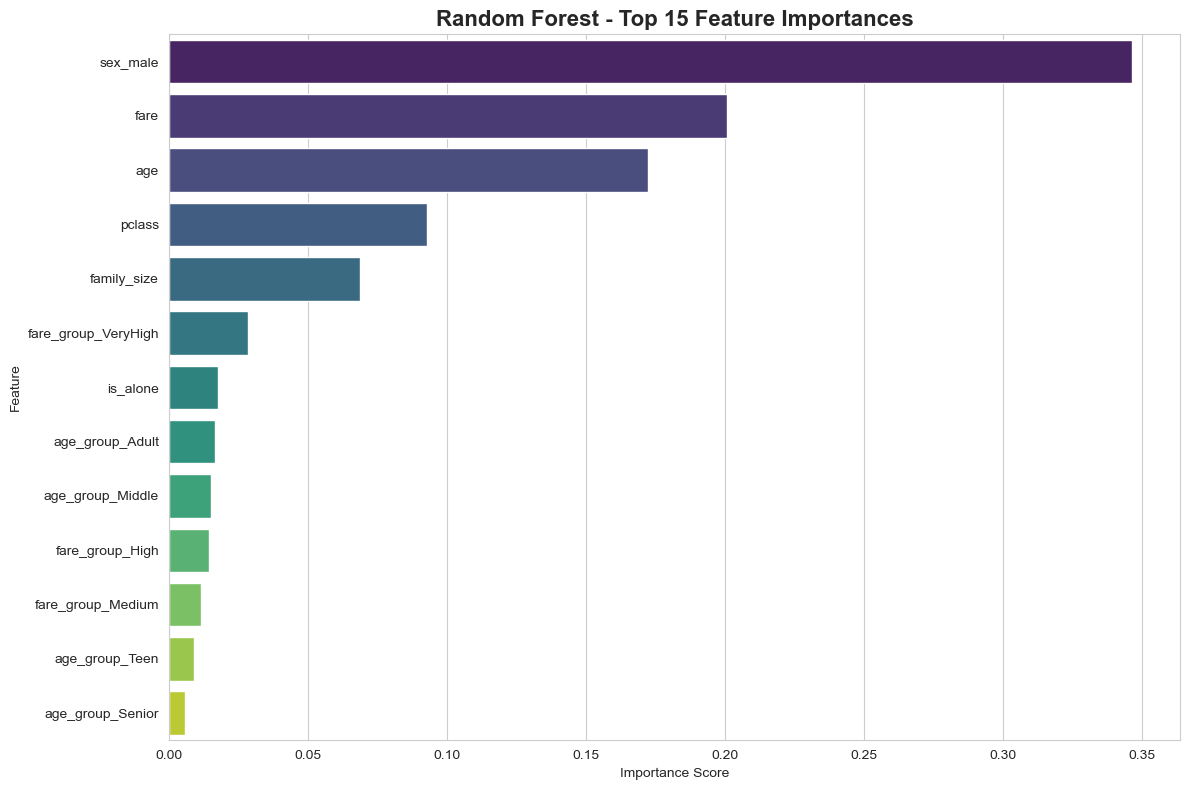


📊 Top 10 Features:
            feature  importance
           sex_male    0.346479
               fare    0.200813
                age    0.172425
             pclass    0.092876
        family_size    0.068773
fare_group_VeryHigh    0.028296
           is_alone    0.017589
    age_group_Adult    0.016633
   age_group_Middle    0.015249
    fare_group_High    0.014286


In [10]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='viridis')
plt.title('Random Forest - Top 15 Feature Importances', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n📊 Top 10 Features:")
print(feature_importance.head(10).to_string(index=False))

## 7. 🚀 Gradient Boosting (XGBoost)

In [11]:
if XGBOOST_AVAILABLE:
    # Treinar XGBoost
    xgb_model = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    )
    
    print("🚀 Treinando XGBoost...")
    xgb_model.fit(X_train, y_train)
    
    # Predições
    y_pred_xgb = xgb_model.predict(X_test)
    y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
    
    # Métricas
    print("\n🚀 XGBoost")
    print("="*50)
    print(f"Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred_xgb):.4f}")
    print(f"F1-Score:  {f1_score(y_test, y_pred_xgb):.4f}")
    print(f"AUC-ROC:   {roc_auc_score(y_test, y_proba_xgb):.4f}")
else:
    print("⚠️ XGBoost não disponível. Pulando...")
    print("💡 Instale com: pip install xgboost")

🚀 Treinando XGBoost...

🚀 XGBoost
Accuracy:  0.8090
Precision: 0.7869
Recall:    0.6957
F1-Score:  0.7385
AUC-ROC:   0.8409

🚀 XGBoost
Accuracy:  0.8090
Precision: 0.7869
Recall:    0.6957
F1-Score:  0.7385
AUC-ROC:   0.8409


## 8. 🎯 Support Vector Machine (SVM)

In [12]:
# IMPORTANTE: SVM requer normalização!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar SVM com kernel RBF
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,  # Para obter probabilidades
    random_state=42
)

print("🎯 Treinando SVM (kernel RBF)...")
svm_model.fit(X_train_scaled, y_train)

# Predições
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Métricas
print("\n🎯 SVM (RBF Kernel)")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_svm):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_proba_svm):.4f}")
print(f"\n📊 Support Vectors: {svm_model.n_support_}")

🎯 Treinando SVM (kernel RBF)...

🎯 SVM (RBF Kernel)
Accuracy:  0.8146
Precision: 0.7903
Recall:    0.7101
F1-Score:  0.7481
AUC-ROC:   0.8469

📊 Support Vectors: [176 162]


## 9. 🧠 Neural Network (MLP)

#### 🧠 MLP e Deep Learning: Qual a relação?

**MLP (Multi-Layer Perceptron)** é considerado a **base fundamental do Deep Learning**. Entenda a conexão:

**MLP Clássico (o que usamos aqui):**
- Rede neural com poucas camadas (tipicamente 2-4 camadas ocultas)
- Totalmente conectada (cada neurônio conecta-se a todos da próxima camada)
- Ideal para dados tabulares (como nosso Titanic)
- Implementação mais simples e rápida de treinar

**Deep Learning (DL):**
- Evolução do MLP com **muitas camadas** (dezenas ou centenas)
- Arquiteturas especializadas: CNN (imagens), RNN/LSTM (sequências), Transformers (texto)
- Capaz de aprender representações muito complexas
- Requer mais dados e poder computacional (geralmente GPUs)

**Nossa arquitetura MLP:**
```python
hidden_layer_sizes=(100, 50, 25)
```
- **3 camadas ocultas** com 100, 50 e 25 neurônios
- Tecnicamente já é "deep" (mais de 2 camadas)
- Mas é considerado MLP porque é relativamente "raso" comparado a redes modernas

**Quando usar cada um:**
- **MLP**: Dados tabulares, problemas de classificação/regressão tradicionais (como Titanic)
- **Deep Learning**: Imagens, vídeo, áudio, texto, séries temporais complexas

💡 **Resumo**: MLP é o "pai" do Deep Learning. Usamos MLP aqui porque é perfeito para dados estruturados!

In [13]:
# Treinar MLP (usando dados normalizados)
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25),  # 3 camadas ocultas
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

print("🧠 Treinando Neural Network (MLP)...")
mlp_model.fit(X_train_scaled, y_train)

# Predições
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_proba_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]

# Métricas
print("\n🧠 Neural Network (MLP)")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_mlp):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_mlp):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_proba_mlp):.4f}")
print(f"\n📊 Iterations: {mlp_model.n_iter_}")
print(f"📊 Layers: {mlp_model.n_layers_}")

🧠 Treinando Neural Network (MLP)...

🧠 Neural Network (MLP)
Accuracy:  0.7865
Precision: 0.7385
Recall:    0.6957
F1-Score:  0.7164
AUC-ROC:   0.8280

📊 Iterations: 21
📊 Layers: 5

🧠 Neural Network (MLP)
Accuracy:  0.7865
Precision: 0.7385
Recall:    0.6957
F1-Score:  0.7164
AUC-ROC:   0.8280

📊 Iterations: 21
📊 Layers: 5


## 10. 📊 Comparação de Modelos

In [14]:
# Compilar resultados
results = []

# Decision Tree
results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt),
    'AUC-ROC': roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
})

# Random Forest
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'AUC-ROC': roc_auc_score(y_test, y_proba_rf)
})

# XGBoost (se disponível)
if XGBOOST_AVAILABLE:
    results.append({
        'Model': 'XGBoost',
        'Accuracy': accuracy_score(y_test, y_pred_xgb),
        'Precision': precision_score(y_test, y_pred_xgb),
        'Recall': recall_score(y_test, y_pred_xgb),
        'F1-Score': f1_score(y_test, y_pred_xgb),
        'AUC-ROC': roc_auc_score(y_test, y_proba_xgb)
    })

# SVM
results.append({
    'Model': 'SVM (RBF)',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'AUC-ROC': roc_auc_score(y_test, y_proba_svm)
})

# MLP
results.append({
    'Model': 'Neural Network',
    'Accuracy': accuracy_score(y_test, y_pred_mlp),
    'Precision': precision_score(y_test, y_pred_mlp),
    'Recall': recall_score(y_test, y_pred_mlp),
    'F1-Score': f1_score(y_test, y_pred_mlp),
    'AUC-ROC': roc_auc_score(y_test, y_proba_mlp)
})

# Criar DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("\n📊 Comparação de Modelos")
print("="*80)
print(results_df.to_string(index=False))

# Encontrar melhor modelo
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\n🏆 Melhor modelo: {best_model['Model']} (Accuracy: {best_model['Accuracy']:.4f})")


📊 Comparação de Modelos
         Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
 Decision Tree    0.8034     0.7576  0.7246    0.7407   0.8359
 Random Forest    0.8146     0.7812  0.7246    0.7519   0.8445
       XGBoost    0.8090     0.7869  0.6957    0.7385   0.8409
     SVM (RBF)    0.8146     0.7903  0.7101    0.7481   0.8469
Neural Network    0.7865     0.7385  0.6957    0.7164   0.8280

🏆 Melhor modelo: Random Forest (Accuracy: 0.8146)


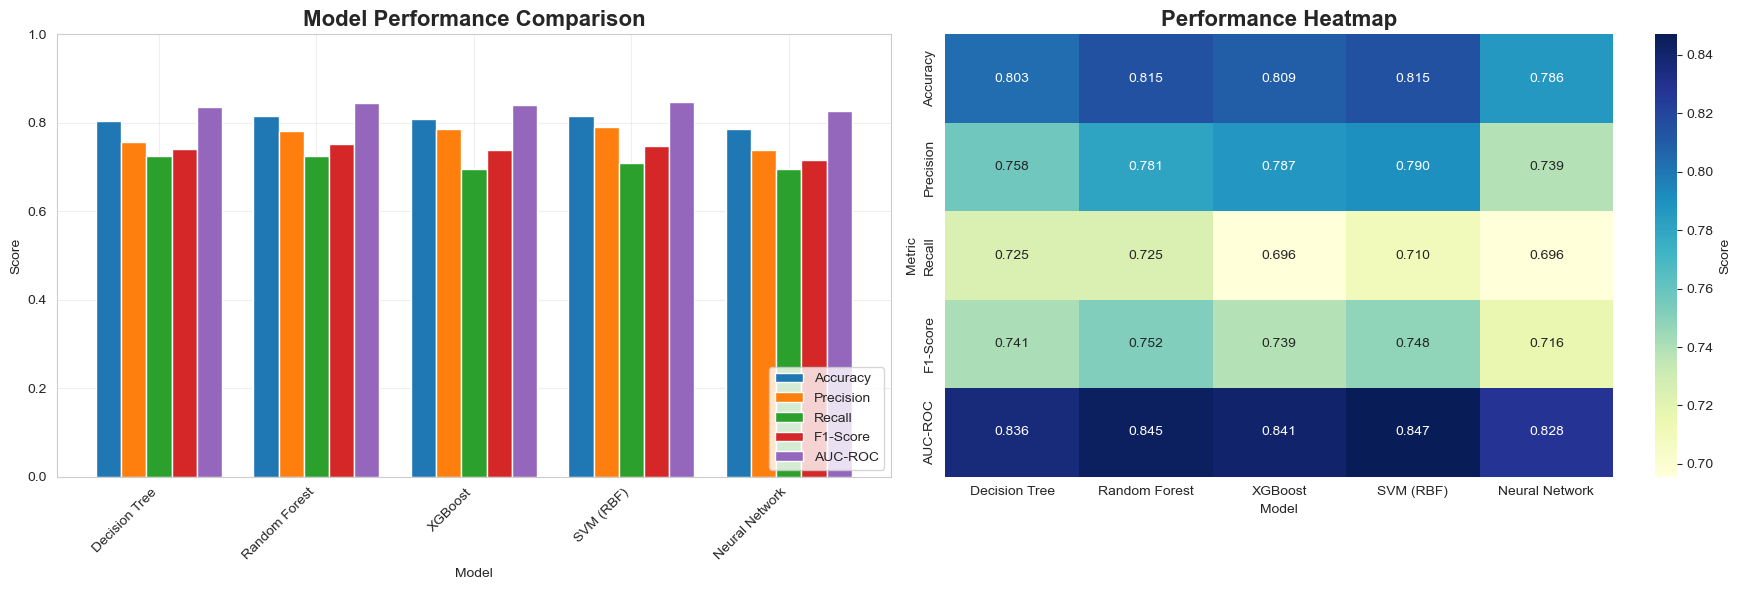

In [15]:
# Visualizar comparação
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de barras
results_df.set_index('Model').plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Model')
axes[0].legend(loc='lower right')
axes[0].set_ylim(0, 1)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')

# Heatmap
results_heatmap = results_df.set_index('Model').T
sns.heatmap(results_heatmap, annot=True, fmt='.3f', cmap='YlGnBu', ax=axes[1], cbar_kws={'label': 'Score'})
axes[1].set_title('Performance Heatmap', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Metric')

plt.tight_layout()
plt.show()

## 11. 🔍 Confusion Matrices

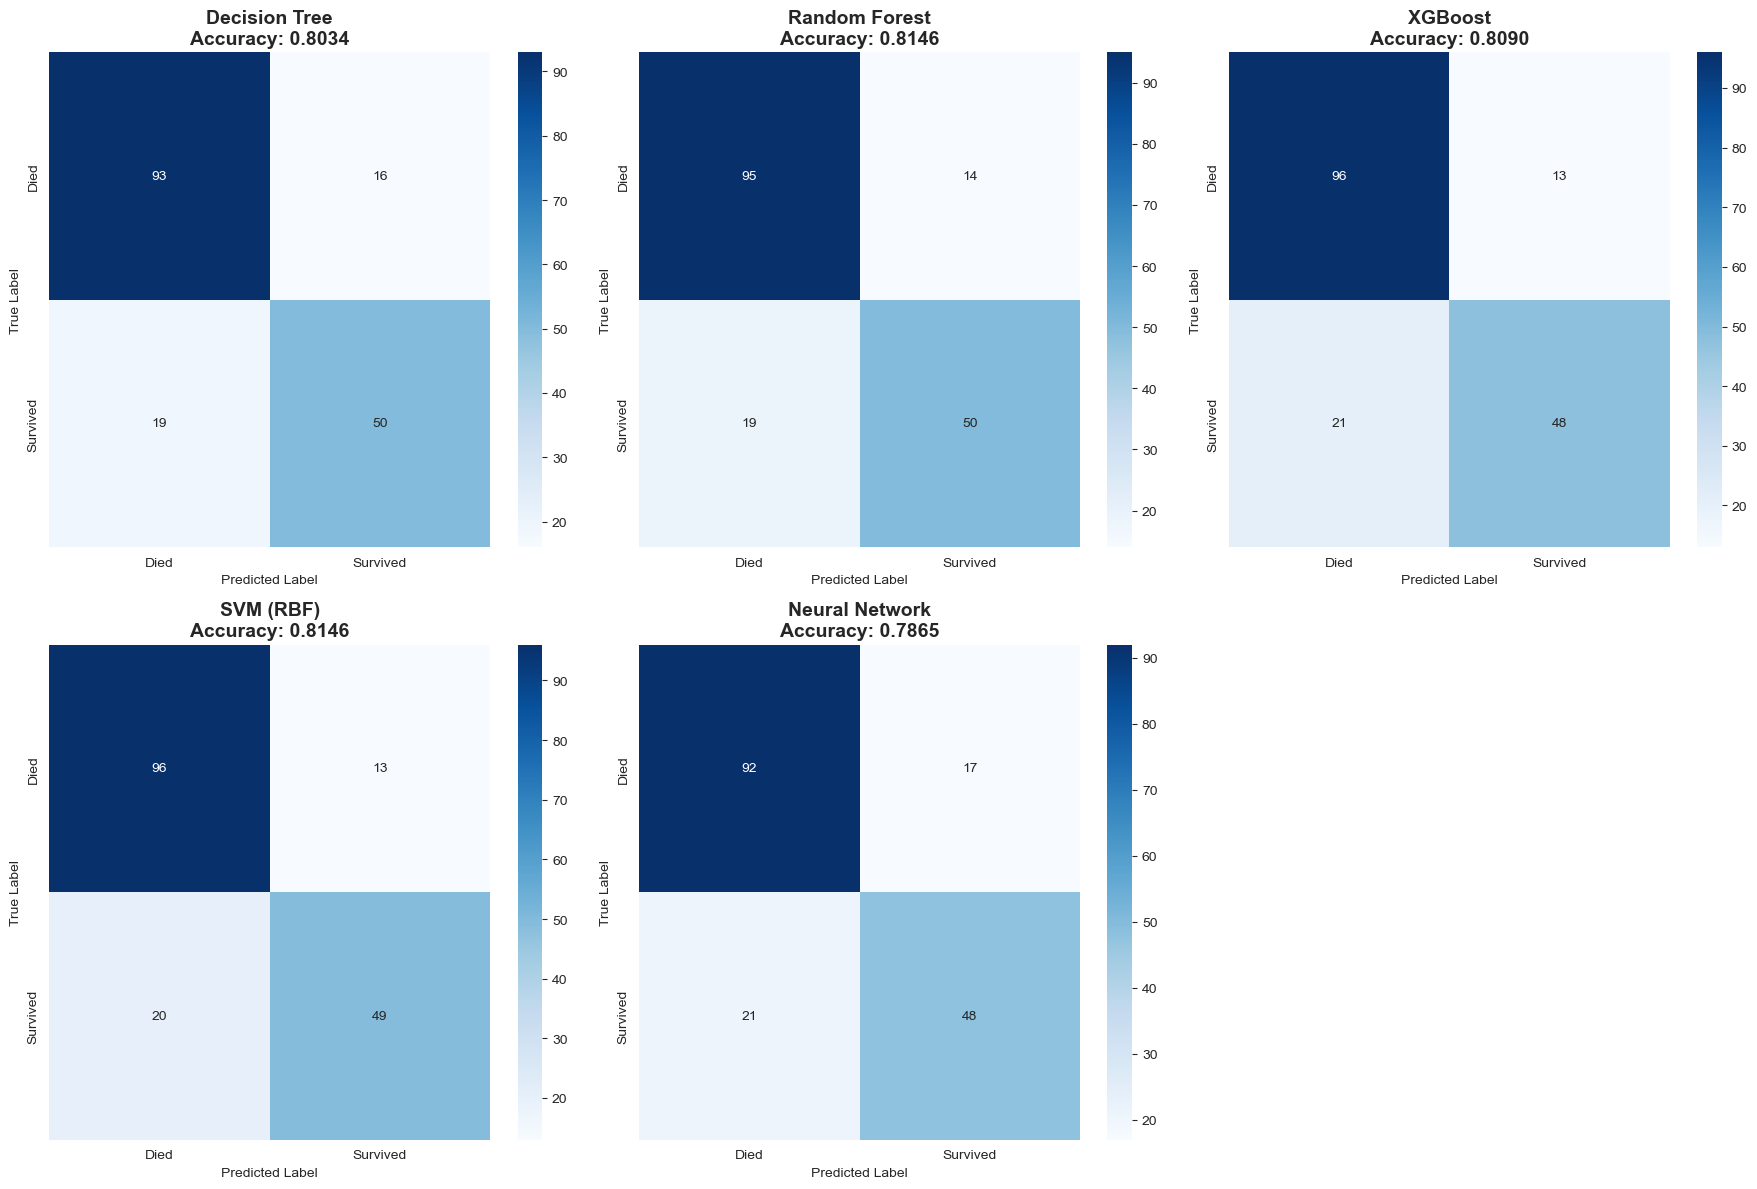

In [16]:
# Preparar dados para confusion matrices
models = [dt_model, rf_model, svm_model, mlp_model]
model_names = ['Decision Tree', 'Random Forest', 'SVM (RBF)', 'Neural Network']
predictions = [y_pred_dt, y_pred_rf, y_pred_svm, y_pred_mlp]

if XGBOOST_AVAILABLE:
    models.insert(2, xgb_model)
    model_names.insert(2, 'XGBoost')
    predictions.insert(2, y_pred_xgb)

# Plotar confusion matrices
n_models = len(models)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, y_pred) in enumerate(zip(model_names, predictions)):
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Died', 'Survived'],
                yticklabels=['Died', 'Survived'])
    
    acc = accuracy_score(y_test, y_pred)
    axes[idx].set_title(f'{name}\nAccuracy: {acc:.4f}', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

# Remover subplot extra se ímpar
if n_models < 6:
    for idx in range(n_models, 6):
        fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 12. 📈 ROC Curves

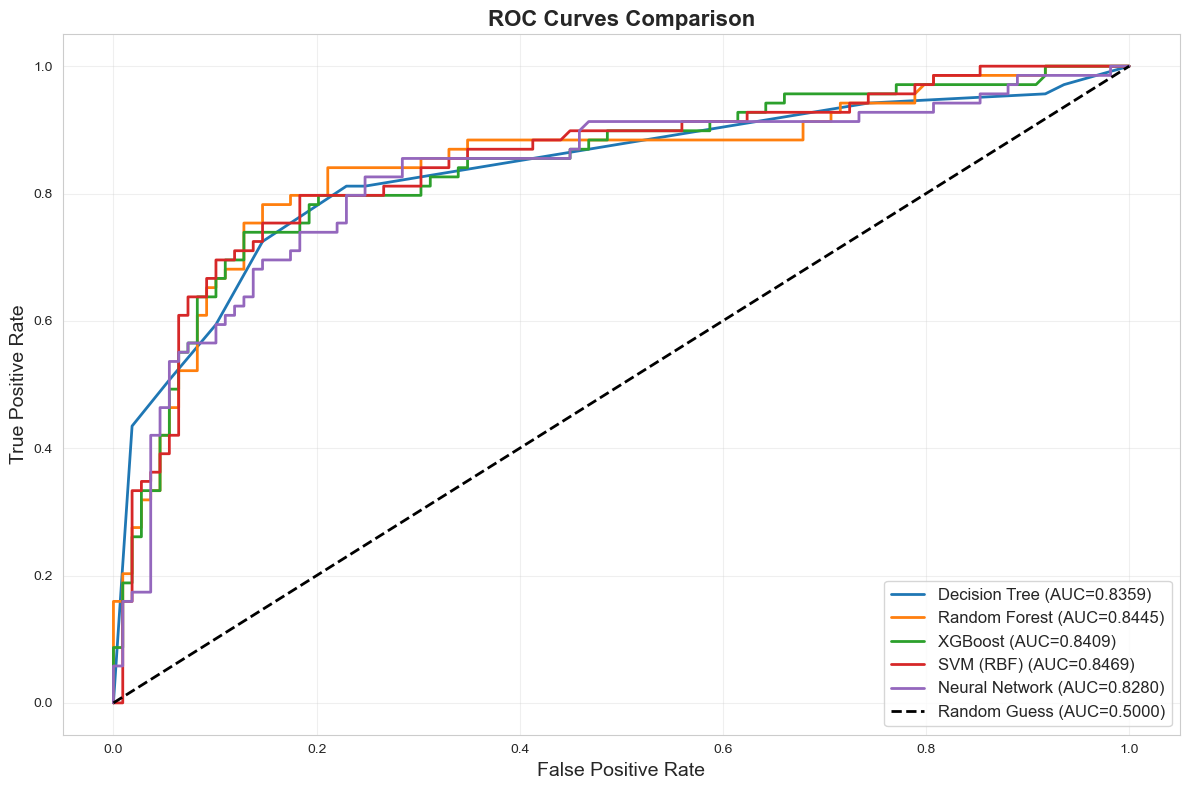

In [17]:
# Preparar probabilidades
probas = [
    dt_model.predict_proba(X_test)[:, 1],
    y_proba_rf,
    y_proba_svm,
    y_proba_mlp
]

if XGBOOST_AVAILABLE:
    probas.insert(2, y_proba_xgb)

# Plotar ROC curves
plt.figure(figsize=(12, 8))

for name, y_proba in zip(model_names, probas):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.4f})', linewidth=2)

# Linha diagonal (random guess)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC=0.5000)', linewidth=2)

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves Comparison', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 13. 📝 Análise Final e Conclusões

In [18]:
print("\n" + "="*80)
print("📊 ANÁLISE FINAL - SEMANA 3, DIA 1")
print("="*80)

print("\n🏆 RANKING DE MODELOS (por Accuracy):")
ranking = results_df.sort_values('Accuracy', ascending=False)
for idx, row in ranking.iterrows():
    print(f"  {idx+1}. {row['Model']}: {row['Accuracy']:.4f}")

print("\n📈 MELHORIAS vs BASELINE (Decision Tree):")
baseline_acc = results_df[results_df['Model'] == 'Decision Tree']['Accuracy'].values[0]
for idx, row in results_df.iterrows():
    if row['Model'] != 'Decision Tree':
        improvement = ((row['Accuracy'] - baseline_acc) / baseline_acc) * 100
        symbol = "📈" if improvement > 0 else "📉"
        print(f"  {symbol} {row['Model']}: {improvement:+.2f}%")

print("\n💡 INSIGHTS:")
print("  • Ensemble methods (RF, XGBoost) geralmente superam modelos simples")
print("  • SVM requer normalização dos dados para funcionar bem")
print("  • Neural Networks podem precisar de mais dados para brilhar")
print("  • Feature engineering teve impacto significativo nos resultados")

print("\n🎯 PRÓXIMOS PASSOS:")
print("  1. Hyperparameter tuning (Grid Search / Random Search)")
print("  2. Cross-validation mais robusto")
print("  3. Ensemble de modelos (voting/stacking)")
print("  4. Feature selection mais refinado")
print("="*80)


📊 ANÁLISE FINAL - SEMANA 3, DIA 1

🏆 RANKING DE MODELOS (por Accuracy):
  2. Random Forest: 0.8146
  4. SVM (RBF): 0.8146
  3. XGBoost: 0.8090
  1. Decision Tree: 0.8034
  5. Neural Network: 0.7865

📈 MELHORIAS vs BASELINE (Decision Tree):
  📈 Random Forest: +1.39%
  📈 XGBoost: +0.70%
  📈 SVM (RBF): +1.39%
  📉 Neural Network: -2.10%

💡 INSIGHTS:
  • Ensemble methods (RF, XGBoost) geralmente superam modelos simples
  • SVM requer normalização dos dados para funcionar bem
  • Neural Networks podem precisar de mais dados para brilhar
  • Feature engineering teve impacto significativo nos resultados

🎯 PRÓXIMOS PASSOS:
  1. Hyperparameter tuning (Grid Search / Random Search)
  2. Cross-validation mais robusto
  3. Ensemble de modelos (voting/stacking)
  4. Feature selection mais refinado


---

## ✅ Objetivos Alcançados

- [x] Random Forest implementado e avaliado
- [x] XGBoost implementado (se disponível)
- [x] SVM implementado com normalização
- [x] Neural Network (MLP) implementado
- [x] Feature engineering avançado
- [x] Comparação estatística completa
- [x] Visualizações profissionais
- [x] Feature importance analysis
- [x] ROC curves e AUC scores
- [x] Confusion matrices

## 🎓 Aprendizados

_A ser preenchido ao final da sessão..._

---

**Documentação completa:** [11-dia1-semana3-ml-supervisionado.md](../../docs/11-dia1-semana3-ml-supervisionado.md)